# Visualize output

In [1]:
# load the results and compound data
import pandas as pd
import glob
import os
import sys
import matplotlib.pyplot as plt

In [2]:
ranking_root = '/scratch/users/nphill22/projects/corsello_lab/rep1k_analysis/output'

In [3]:
ranking_dirs = glob.glob(ranking_root + "/*")


In [4]:
print(len(ranking_dirs))


1111


In [5]:
ranking_map = {}
for p in ranking_dirs:
    drug = p.split("/")[-1]
    ranking_map[drug] = p

In [13]:
ranking_results = {}
for drug, path in ranking_map.items():
    train_results_path = os.path.join(path, "train_results.csv")
    if not os.path.exists(train_results_path):
        continue
    df = pd.read_csv(train_results_path)
    df.rename(columns={"pred": "ranking_preds", "label": "true"}, inplace=True)
    
    ranking_results[drug] = df


In [14]:
final_preds = []
for drug, ranking_df in ranking_results.items():
    ranking_df = ranking_df.sort_values("ranking_preds", ascending=False).drop_duplicates("ccle_name").sort_index()
    ranking_df["drug"] = drug
    final_preds.append(ranking_df)

In [17]:
from scipy.stats import pearsonr

In [20]:
# Compute pearson correlation
out = []
df_out = {}
for df in final_preds:
    # fill ranking_preds nan with mean
    df["ranking_preds"] = df["ranking_preds"].fillna(df["ranking_preds"].mean())
    drug = df["drug"].values[0]
    y = df["true"].values
    x_rank = df["ranking_preds"].values
    r_rank = pearsonr(x_rank, y)[0]

    #with open(ranking_root + f"/{drug}/{drug}/train_corr.txt", 'r') as f:
    #    r_rank = f.read()

    out.append(
        {
            "drug": drug,
            "pearsonr_rank": r_rank
        }
    )
    df_out[drug] = df


In [21]:
pearson_df = pd.DataFrame(out)

In [22]:
pearson_df

,drug,pearsonr_rank
0,URMC-099,0.343011
1,esonarimod,0.337845
2,BMS-935177,0.363187
3,L-760735,0.286637
4,NU-2058,0.338976
...,...,...
1106,pocapavir,0.265196
1107,PTC-209,0.290072
1108,glecaprevir,0.319328
1109,BAY-60-6583,0.263353


In [23]:
drug_data = pd.read_csv("../../../data/raw/rep-1m-public-tentative_v7-compound-dashboard-table.csv")

In [25]:
drug_data = drug_data.loc[:, ["Name", "BimodalityCoefficient"]]
drug_data.rename(columns={"Name": "drug"}, inplace=True)

In [26]:
pearson_df = pearson_df.merge(drug_data, on="drug")

(0.1, 0.8)

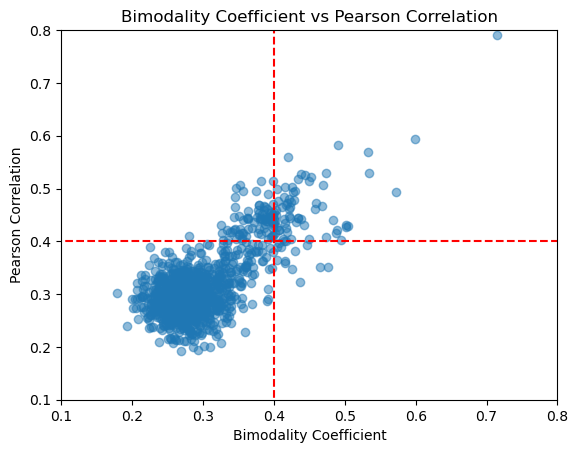

In [32]:
# plot the BimodalityCoefficient on x axis vs pearsonr on y axis
plt.scatter(pearson_df["BimodalityCoefficient"], pearson_df["pearsonr_rank"], alpha=0.5)
plt.xlabel("Bimodality Coefficient")
plt.ylabel("Pearson Correlation")
plt.title("Bimodality Coefficient vs Pearson Correlation")
# plot y = .4, red dotted line
# plot x = .4, red dotted line
# only have lines cover range of data
plt.plot([0, 1], [.4, .4], 'r--')
plt.plot([.4, .4], [0, 1], 'r--')
plt.xlim(.1, .8)
plt.ylim(.1, .8)

In [35]:
# get a list of highly bimodal, high correlating drugs
right_quad = pearson_df.loc[(pearson_df["BimodalityCoefficient"] > .4) & (pearson_df["pearsonr_rank"] > .4), :]
# sort descending pearsonr
right_quad = right_quad.sort_values("pearsonr_rank", ascending=False)
# show the first 30 
right_quad.head(30)

,drug,pearsonr_rank,BimodalityCoefficient
841,milademetan,0.790251,0.714498
714,AZD5991,0.594480,0.599086
412,adavivint,0.582350,0.491030
687,PRLX-93936,0.570038,0.532358
625,encorafenib,0.560140,0.419860
361,PF-06747775,0.530255,0.533511
542,RAF709,0.529232,0.473122
703,ML786,0.526804,0.437863
810,CT7001,0.524872,0.443661
767,avitinib,0.522753,0.452334
